# Fashion Classification

Multi-class classification using neural networks.

- [image-net dataset](https://image-net.org/)
- [Pre trained models (Keras)](https://keras.io/api/applications/)

Complementary material:

- [course - cs231n](https://cs231n.github.io/)


Append notebooks directory to sys.path


In [ ]:
import sys

sys.path.append("../../..")

Install packages


In [2]:
!uv pip install -q \
    python-dotenv==1.2.1 \
    pandas==2.3.2 \
    pandas-stubs==2.3.2.250827 \
    numpy==2.3.2 \
    matplotlib==3.10.6 \
    seaborn==0.13.2 \
    tensorflow==2.20.0

Import packages


In [3]:
import os
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import (
     Xception, preprocess_input, decode_predictions
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

pd.set_option("display.max_columns", None)

sns.set_style("darkgrid")
sns.set_theme(style="darkgrid")

%matplotlib inline

2025-12-28 10:40:09.088371: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-12-28 10:40:09.098386: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-28 10:40:09.426115: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-28 10:40:13.370590: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

Create data directory


In [ ]:
DATA_DIR = pathlib.Path("data/fashion-classification")

os.makedirs(DATA_DIR, exist_ok=True)

Download images from github repository


In [5]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small $DATA_DIR --depth 1

fatal: destination path 'data/fashion-classification' already exists and is not an empty directory.


Loading an image


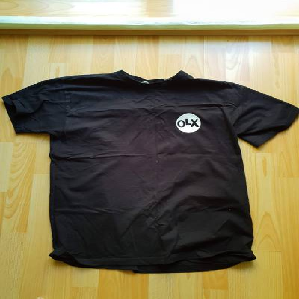

In [ ]:
file_name = "5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg"
path = DATA_DIR / "train" / "t-shirt" / file_name
img = load_img(path, target_size=(299, 299))
img

Check image object


In [ ]:
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7C9FBC9AD750>


Seeing the image as array, each array contains 3 values (RGB)


In [ ]:
np.array(img)[:3, :3, :]

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126]]], dtype=uint8)

Array size


In [ ]:
x = np.array(img)
x.shape

(299, 299, 3)

## Pre-trained convolutional neural networks


Instance model


In [ ]:
model = Xception(weights="imagenet", input_shape=(299, 299, 3))

2025-12-28 10:40:14.474096: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Check X shape


In [ ]:
X = np.array([x])
X.shape

(1, 299, 299, 3)

Preprocess the image to fit the model input requirements

Instead of **0 - 255** (RGB), values should be between _-1 and 1_


In [ ]:
X = preprocess_input(X)
X[:, :3, :3, :]

array([[[[ 0.4039216 ,  0.3411765 , -0.2235294 ],
         [ 0.4039216 ,  0.3411765 , -0.2235294 ],
         [ 0.41960788,  0.35686278, -0.20784312]],

        [[ 0.47450984,  0.4039216 , -0.12156862],
         [ 0.4666667 ,  0.39607847, -0.12941176],
         [ 0.45882356,  0.38823533, -0.15294117]],

        [[ 0.56078434,  0.48235297, -0.00392157],
         [ 0.5686275 ,  0.4901961 ,  0.00392163],
         [ 0.5686275 ,  0.49803925, -0.01176471]]]], dtype=float32)

Predict


In [ ]:
pred = model.predict(X)
pred.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step


(1, 1000)

Decode predictions


In [ ]:
decode_predictions(pred)

[[('n03595614', 'jersey', np.float32(0.68196267)),
  ('n02916936', 'bulletproof_vest', np.float32(0.03814007)),
  ('n04370456', 'sweatshirt', np.float32(0.03432477)),
  ('n03710637', 'maillot', np.float32(0.011354245)),
  ('n04525038', 'velvet', np.float32(0.0018453626))]]

## Convolutional Neural Networks (CNNs)

- Convolutional layers
- Dense Layers
- Pooling Layers

### Convolutional Layers

Convolultional layers are based in filters (kernels) that slide through the input data to extract features.

For each part of the input data and each filter, is calculated the similarity between the filter and the input data.

As result, we have a feature map that indicates where the feature represented by the filter is found in the input data.

High values in the feature map indicate high similarity between the filter and the input data.

At the end we have several feature maps, one for each filter.

Then another layer can be added to extract more complex features based on the previous feature maps and so on.

The final result is a vector that represents the input data in terms of the features extracted by the filters.

### Dense Layers

Dense layers connect each element of input data to each element of output data.

There are a lot of connections and each connection has a weight that indicates the importance of that connection.

### Pooling Layers

Pooling layers are used to reduce the size of the input data.


## Transfer Learning

- Use the convolutional base of a pre-trained model
- Add custom dense layers on top
- Train only the custom layers


In [ ]:
train_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

In [ ]:
train_dataset = train_generator.flow_from_directory(
    DATA_DIR / "train",
    target_size=(150, 150),
    batch_size=32,
)

Found 3068 images belonging to 10 classes.


Class names are inferred from the directory structure


In [ ]:
train_dataset.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

Folders


In [18]:
!ls $DATA_DIR/train

dress  hat  longsleeve	outwear  pants	shirt  shoes  shorts  skirt  t-shirt


Validation Data


In [ ]:
validation_generator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

validation_dataset = validation_generator.flow_from_directory(
    DATA_DIR / "validation",
    target_size=(150, 150),
    batch_size=32,
    shuffle=False,
)

Found 341 images belonging to 10 classes.


Setup model for transfer learning


In [ ]:
base_model = Xception(
    weights="imagenet",
    include_top=False,  # Top means the dense layers
    input_shape=(150, 150, 3),
)

base_model.trainable = False  # Do not train the convolutional base

Define model


In [ ]:
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs, training=False)  # 3 Dimensional

pooling = keras.layers.GlobalAveragePooling2D()

vectors = pooling(base)  # 2 Dimensional

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

Define optimizer and loss function


In [ ]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

Compile model


In [ ]:
model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

Train model


In [ ]:
history = model.fit(
    train_dataset,
    epochs=10,  # Go through the dataset 10 times
    validation_data=validation_dataset,
)

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 772ms/step - accuracy: 0.6695 - loss: 1.3397 - val_accuracy: 0.7566 - val_loss: 0.9390
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 71s 739ms/step - accuracy: 0.8178 - loss: 0.5754 - val_accuracy: 0.8094 - val_loss: 0.8716
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 72s 755ms/step - accuracy: 0.8791 - loss: 0.3390 - val_accuracy: 0.7830 - val_loss: 0.8933
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 75s 779ms/step - accuracy: 0.9068 - loss: 0.2671 - val_accuracy: 0.8006 - val_loss: 0.8346
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 73s 756ms/step - accuracy: 0.9433 - loss: 0.1649 - val_accuracy: 0.7947 - val_loss: 0.9947
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 73s 764ms/step - accuracy: 0.9224 - loss: 0.2196 - val_accuracy: 0.8182 - val_loss: 0.8906
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 73s 759ms/step - accuracy: 0.9531 - loss: 0.1322 - val_accuracy: 0.7947 - val_loss: 1.0076
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 78s 811ms/step - accuracy: 0.9687 - loss: 0.0803 - val_accu

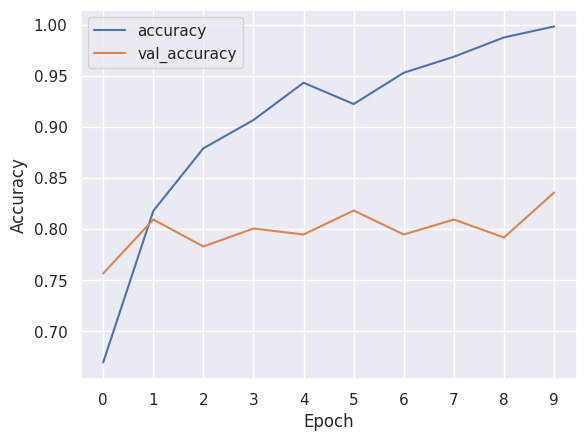

In [ ]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xticks(range(10))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Adjusting Learning Rate

We can do an analogy to learning rate as how fast you can read a book, if you read to much books very fast when you need to apply the knowledge you may not have learned the necessary, also if you read to slow, you may not have acquire enough knowledge and will also perform poorly.

- Too high learning rate may overfit the model
- Too low learning rate may underfit the model


In [ ]:
def make_model(learning_rate=0.01):
    base_model = Xception(
        weights="imagenet", include_top=False, input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)

    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=["accuracy"])

    return model

Try different learning rates


In [ ]:
scores = {}

for learning_rate in [0.0001, 0.001, 0.01, 0.1]:
    print(learning_rate)

    model = make_model(learning_rate=learning_rate)
    history = model.fit(
        train_dataset, epochs=10, validation_data=validation_dataset
    )
    scores[learning_rate] = history.history

    print(20 * "=")

0.0001
Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 77s 781ms/step - accuracy: 0.3761 - loss: 1.8587 - val_accuracy: 0.5308 - val_loss: 1.5678
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 76s 794ms/step - accuracy: 0.5756 - loss: 1.3629 - val_accuracy: 0.6158 - val_loss: 1.2417
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 818ms/step - accuracy: 0.6457 - loss: 1.1328 - val_accuracy: 0.6745 - val_loss: 1.0655
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 818ms/step - accuracy: 0.6887 - loss: 0.9965 - val_accuracy: 0.7097 - val_loss: 0.9534
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 78s 815ms/step - accuracy: 0.7132 - loss: 0.9056 - val_accuracy: 0.7449 - val_loss: 0.8757
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 79s 821ms/step - accuracy: 0.7304 - loss: 0.8390 - val_accuracy: 0.7478 - val_loss: 0.8234
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 78s 815ms/step - accuracy: 0.7448 - loss: 0.7862 - val_accuracy: 0.7654 - val_loss: 0.7822
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 78s 818ms/step - accuracy: 0.7542 - loss: 0.7444 - v

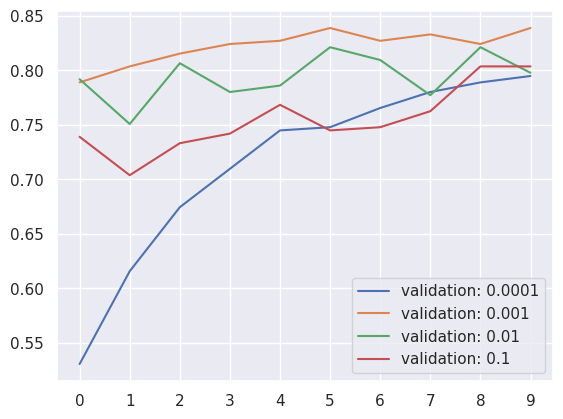

In [ ]:
for learning_rate, history in scores.items():
    # plt.plot(history["accuracy"], label=f"train: {learning_rate}")
    plt.plot(history["val_accuracy"], label=f"validation: {learning_rate}")


plt.xticks(np.arange(10))
plt.legend()
plt.show()

In [ ]:
learning_rate = 0.001

## Checkpointing

Saving the model on a specific iteration when certain conditions are meet


In [44]:
checkpoint = keras.callbacks.ModelCheckpoint(
    "xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5",
    save_best_only=True,
    monitor="val_accuracy",
    mode="max",
)